In [1]:
# Install pip packages in the current Jupyter kernel

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"D:\heeju\특화 프로젝트\DataAnalysis\DataSet") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df=pd.read_csv("서울시 상권분석서비스(직장인구-상권).csv",encoding='euc-kr') 
df.head()

# 데이터 shape 파악
df.shape

(3255, 26)

In [2]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110001

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

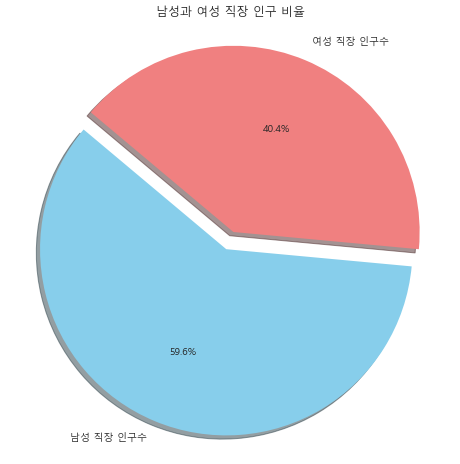

In [3]:
# 데이터 준비
male_employed_population = target_market_data[target_market_data['Year'] == 2023]['남성_직장_인구_수'].sum()
female_employed_population = target_market_data[target_market_data['Year'] == 2023]['여성_직장_인구_수'].sum()

# 파이차트 그리기
labels = ['남성 직장 인구수', '여성 직장 인구수']
sizes = [male_employed_population, female_employed_population]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # 강조를 위해 첫 번째 조각을 조금 벗어나도록 설정

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('남성과 여성 직장 인구 비율')
plt.axis('equal')  # 원형을 유지하기 위해
plt.show()

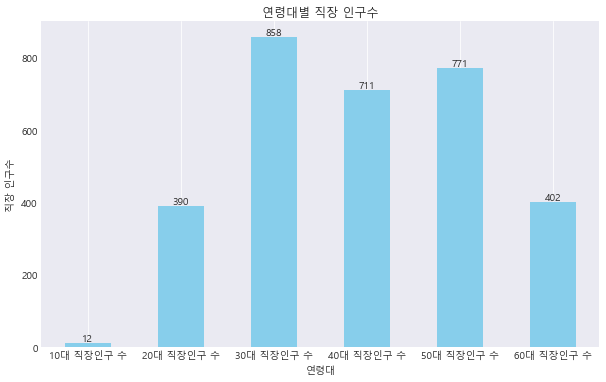

In [6]:
# 연령대별 직장 인구수 컬럼 선택
age_columns = ['연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수',
               '연령대_40_직장_인구_수', '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수']

# 각 연령대별 직장 인구수 합산
age_population = target_market_data[target_market_data['Year'] == 2023][age_columns].sum()

# 시간대 라벨 수정
age_labels = [f'{age[4:6]}대 직장인구 수' for age in age_columns]

# 바 차트 그리기
plt.figure(figsize=(10, 6))
age_population.plot(kind='bar', color='skyblue')
plt.title('연령대별 직장 인구수')
plt.xlabel('연령대')
plt.ylabel('직장 인구수')
plt.xticks(range(len(age_labels)), age_labels, rotation=0)
plt.grid(axis='y')

# y축 값 표시
for i, value in enumerate(age_population):
    plt.text(i, value, f'{value}', ha='center', va='bottom')
    
plt.show()

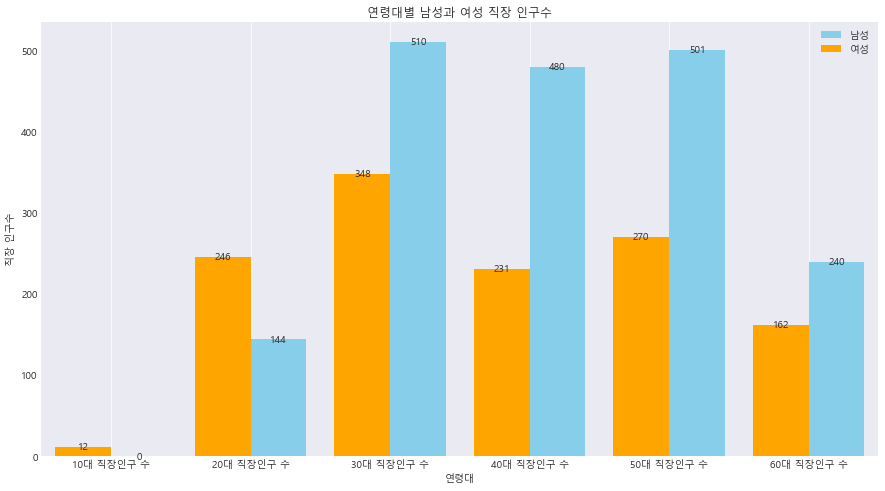

In [15]:
# 연령대별 직장 인구수 컬럼 선택
male_age_columns = ['남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수',
                    '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수']

female_age_columns = ['여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수',
                      '여성연령대_40_직장_인구_수', '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수']

# 각 연령대별 직장 인구수 합산 (남성, 여성)
male_age_population = target_market_data[target_market_data['Year'] == 2023][male_age_columns].sum()
female_age_population = target_market_data[target_market_data['Year'] == 2023][female_age_columns].sum()

# 시간대 라벨 수정
age_labels = [f'{age[4:6]}대 직장인구 수' for age in age_columns]

# 바 차트 그리기
plt.figure(figsize=(15,8))
male_age_population.plot(kind='bar', color='skyblue', position=0, width=0.4, label='남성')
female_age_population.plot(kind='bar', color='orange', position=1, width=0.4, label='여성')

plt.title('연령대별 남성과 여성 직장 인구수')
plt.xlabel('연령대')
plt.ylabel('직장 인구수')
plt.xticks(range(len(age_labels)), age_labels, rotation=0)
plt.legend()
plt.grid(axis='y')
# y축 값 표시
for i, value in enumerate(female_age_population):
    plt.text(i - 0.2, value, f'{value}', ha='center', va='center')
    
for i, value in enumerate(male_age_population):
    plt.text(i + 0.2, value, f'{value}', ha='center', va='center')

# x 축 범위 설정
plt.xlim(left=-0.5, right=len(male_age_population) - 0.5)

plt.show()